In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv("/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_L.csv")

In [ ]:
X = df.drop('label', axis=1)
y = df['label']

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
n_clusters = 7  # Number of skin lesion classes
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7, random_state=42)

In [ ]:
score = silhouette_score(X_scaled, kmeans.labels_)
print(f'Silhouette Score for K-Means Clustering: {score:.2f}')

Silhouette Score for K-Means Clustering: 0.12


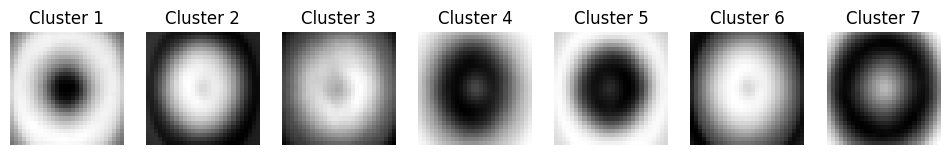

In [ ]:
import matplotlib.pyplot as plt

# Reshape cluster centers to 28x28 and plot them
fig, axes = plt.subplots(1, n_clusters, figsize=(12, 6))
for i, center in enumerate(kmeans.cluster_centers_):
    axes[i].imshow(center.reshape(28, 28), cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f'Cluster {i+1}')
plt.show()
